# 9/09/2022

# Computer vision
# Orqa fon bilan ishlash

# Muallif: Farrux Sotivoldiyev

# Working with the background
* image + image
* image + video
* video + video

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

**`image + image`**

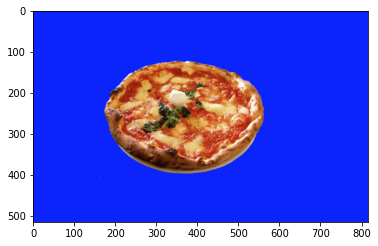

In [4]:
rasm = cv2.imread("RASMLAR/pizza.jpg")
rasm = cv2.cvtColor(rasm,cv2.COLOR_BGR2RGB)
plt.imshow(rasm)

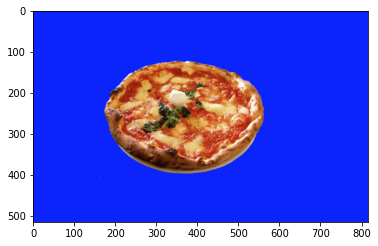

In [5]:
rasm_copy = np.copy(rasm)
plt.imshow(rasm_copy)

In [6]:
np.shape(rasm_copy)

(514, 816, 3)

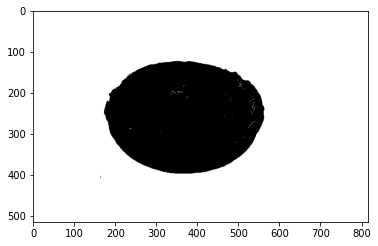

In [7]:
range_1 = np.array([0,0,230])
range_2 = np.array([250,250,255])  
maska = cv2.inRange(rasm_copy,range_1,range_2) # Shu range larning oralig'iga tushganlarini oq qolganlarini esa qora qiladi
plt.imshow(maska,cmap="gray")

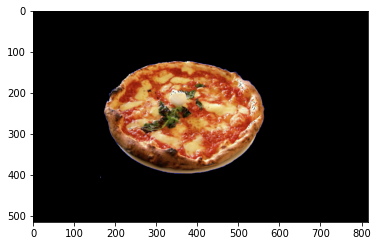

In [8]:
rasm_copy[maska!=0] = [0,0,0]
plt.imshow(rasm_copy)

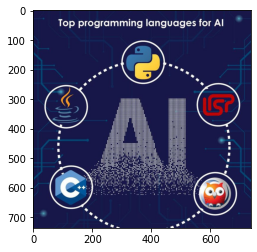

In [9]:
background = cv2.imread("RASMLAR/python3.jpg")
background = cv2.cvtColor(background,cv2.COLOR_BGR2RGB)
plt.imshow(background)

In [10]:
background.shape

(736, 736, 3)

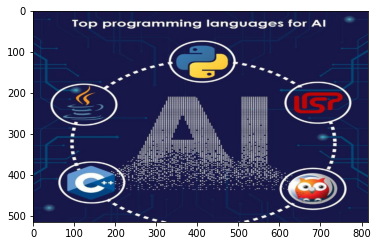

In [11]:
background = cv2.resize(background,(816,514))
plt.imshow(background)

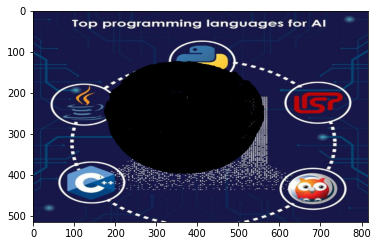

In [12]:
background1 = np.copy(background)
background1[maska==0] = [0,0,0]
plt.imshow(background1)

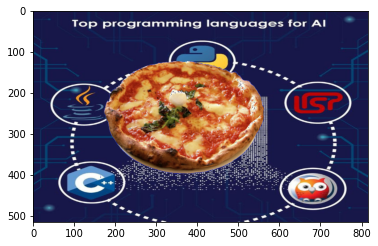

In [15]:
%matplotlib inline
new_rasm = rasm_copy + background1
plt.imshow(new_rasm)

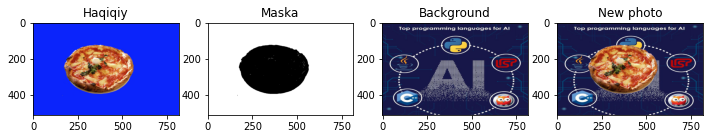

In [16]:
plt.figure(figsize=(12,8))

plt.subplot(141)
plt.title("Haqiqiy")
plt.imshow(rasm)

plt.subplot(142)
plt.title("Maska")
plt.imshow(maska,cmap="gray")

plt.subplot(143)
plt.title("Background")
plt.imshow(background)

plt.subplot(144)
plt.title("New photo")
plt.imshow(new_rasm)

**`image + video`**

**`O'rmon rasmiga sherning harakatini qo'ydim`**

In [17]:
video = cv2.VideoCapture("VIDEOLAR/tiger.mp4")
rasm = cv2.imread("RASMLAR/ormon.jpg")
rasm = cv2.resize(rasm,(1280,720))
range_1 = np.array([0,100,0])
range_2 = np.array([100,255,100])

while video.isOpened():
    i,kadr = video.read()
    
    if not i:
        break
        
    rasm_copy = rasm.copy()
    maska = cv2.inRange(kadr,range_1,range_2)
    kadr[maska!=0] = [0,0,0]
    rasm_copy[maska==0] = [0,0,0]
    
    kadr += rasm_copy
    cv2.imshow("O'rmondagi yo'lbars",kadr)
    
    if cv2.waitKey(1) & 0xFF==ord("q"):
        break
        
video.release()
cv2.destroyAllWindows()

**`Xona rasmiga qizchaning videosini qo'ydim`**

In [18]:
video = cv2.VideoCapture("VIDEOLAR/qizcha(gif).mp4")
rasm = cv2.imread("RASMLAR/Mehmonxona1.jpg")
rasm = cv2.resize(rasm,(640,480))

range_1 = np.array([0,160,0])
range_2 = np.array([150,255,150])

while video.isOpened():
    i,kadr = video.read()
    
    if not i:
        break
    kadr = cv2.resize(kadr,(640,480))
    rasm_copy = rasm.copy()
    maska = cv2.inRange(kadr,range_1,range_2)
    rasm_copy[maska==0] = 0
    kadr[maska!=0] = 0
    
    kadr += rasm_copy 
    cv2.imshow("Qizcha",kadr)
    
    if cv2.waitKey(40) & 0xFF==ord("q"):
        break
    
video.release()
cv2.destroyAllWindows()

**`video + video`**

**`Yo'lbars o'rmonda`**

In [21]:
video1 = cv2.VideoCapture("VIDEOLAR/Forest_11minutlik_1.mp4")
video2 = cv2.VideoCapture("VIDEOLAR/tiger 11 sekundlik_1.mp4")
range_1 = np.array([0,100,0])
range_2 = np.array([100,250,100])

while video1.isOpened() and video2.isOpened():
    i,kadr1 = video1.read()
    j,kadr2 = video2.read()
    if not i or not j:
        break
    kadr2 = cv2.resize(kadr2,(kadr1.shape[1],kadr1.shape[0]))
    maska = cv2.inRange(kadr2,range_1,range_2)
    kadr1[maska==0] = 0
    kadr2[maska!=0] = 0
    kadr2 += kadr1
    cv2.imshow("O'rmon",kadr2)
    
    if cv2.waitKey(40) & 0xFF==ord("q"):
        break
video1.release()  
video2.release() 
cv2.destroyAllWindows()